In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import seaborn as sns
from hmmlearn import hmm

import warnings
warnings.filterwarnings('ignore')

"""
Скачайте текст войны и мир (ссылка на github и гугл диск). 
Очистите его, оставив только русские буквы и символы пробела. 
Постройте матрицу переходных вероятностей. 
Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; 
Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов
"""

'\nСкачайте текст войны и мир (ссылка на github и гугл диск). \nОчистите его, оставив только русские буквы и символы пробела. \nПостройте матрицу переходных вероятностей. \nПосчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; \nИспользуя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов\n'

In [2]:
"""
Посмтроим матрицу переходных вероятностей 
"""
g = globals()    # Функция globals() возвращает словарь(dict) глобальных переменных и их значений, текущей области

for i in range(1,5):
    name = f'tom_{i}'
    with open (f'tom_{i}.txt', 'r', encoding='utf-8') as text:
        # читаем значения ключа name, переводя буквы в нижний регистр
        g[name] = text.read().lower()  
    g[name] = re.sub(r'[^а-я ]', '', g[name])    # оставляем лишь кириллические символы без цифр и латиницы 
                                                 # re.sub() - поиск и замена на основе регулярного выражения, где 
                                                 # [^а-я ]' - шаблон регулярного выражения (pattern), 
                                                 # '' - строка замены (repl), 
                                                 # g[name] - строка для поиска (string)
                                         # Функция sub() модуля re возвращает строку, полученную путем замены 
                                         # крайнего левого неперекрывающегося вхождения шаблона регулярного выражения 
                                         # pattern в строке string на строку замены repl. 
                                         # Если шаблон регулярного выражения не найден, строка возвращается без изменений.

In [3]:
War_and_peace = tom_1 + tom_2 + tom_3 + tom_4   # объявляем переменную, куда складываем все тома книги


In [4]:
Russian = 'абвгдежзийклмнопрстуфхцчшщъыьэюя'    # объявляем переменную с малыми буквами кириллицы  
POS = {l: i for i, l in enumerate(Russian)}     # в переменной POS через дикт-компрехеншенс создаем словарь: 
                                                # ключ - символ (буква) и его значение - индекс 

In [5]:
probabilities = np.zeros((len(Russian), len(Russian)))  # создаем переменную с квадратной матрицей нулевых вероятностей

In [6]:
for cp, cn in zip(tom_1[:-1], tom_1[1:]):          # цикл:
    if cp == ' ' or cn == ' ':                     # если встречаем пробел в кортеже смещенных символов, то
        continue                                   # идем далее по циклу  
    else:                                          # иначе 
        probabilities[POS[cp], POS[cn]] += 1       # перебираем вероятности встретить в тексте переход от буквы cp к букве cn 

In [7]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None]) # нормируем переменную вероятностей; 
                                                     # для этого делим вероятности 
                                                     # на их сумму в строках (поскольку axis=1)

In [8]:
df = pd.DataFrame(probabilities, index=(c for c in Russian), columns=(c for c in Russian))
df   # создали фрейм, где видим на пересечении строк и столбцов вероятности перехода одних букв в другие 
      # это есть матрица переходных вероятностей

,а,б,в,г,д,е,ж,з,и,й,...,ц,ч,ш,щ,ъ,ы,ь,э,ю,я
а,0.000316,0.012480,0.063519,0.017770,0.039279,0.015729,0.021969,0.073411,0.002732,0.014004,...,0.001610,0.013515,0.018000,0.004342,0.000000,0.000000,0.000000,0.000029,0.014291,0.051212
б,0.080017,0.001749,0.002624,0.001312,0.000984,0.138172,0.000328,0.000109,0.051377,0.000000,...,0.000437,0.001749,0.000328,0.011369,0.004919,0.248907,0.003279,0.000109,0.000437,0.032575
в,0.176948,0.000478,0.000956,0.000860,0.008458,0.127825,0.000000,0.015626,0.100110,0.000000,...,0.000478,0.000908,0.037989,0.000191,0.000478,0.081139,0.004970,0.000048,0.000048,0.003823
г,0.062071,0.000000,0.004608,0.000000,0.052008,0.034045,0.000000,0.000094,0.048998,0.000000,...,0.000000,0.001317,0.000564,0.000000,0.000000,0.000188,0.000000,0.000000,0.000564,0.000000
д,0.164245,0.001402,0.037476,0.000382,0.000829,0.174442,0.000510,0.000191,0.111090,0.000000,...,0.006628,0.000892,0.004207,0.000000,0.011600,0.026769,0.019758,0.000064,0.000574,0.014723
е,0.000338,0.020604,0.026284,0.065803,0.047563,0.028372,0.018331,0.021310,0.003470,0.045015,...,0.005312,0.017625,0.014155,0.012682,0.000000,0.000000,0.000000,0.000000,0.006755,0.007247
ж,0.160909,0.006008,0.000000,0.002816,0.075103,0.445550,0.001502,0.000000,0.131618,0.000000,...,0.000000,0.005633,0.000000,0.000000,0.000000,0.000000,0.004131,0.000188,0.002441,0.000000
з,0.391393,0.010365,0.054078,0.031095,0.047995,0.014984,0.012393,0.005746,0.022533,0.000113,...,0.000225,0.000901,0.000901,0.000000,0.001127,0.038306,0.078414,0.000000,0.008112,0.036728
и,0.001959,0.012937,0.068237,0.012570,0.044933,0.061013,0.010080,0.043097,0.016529,0.037016,...,0.037057,0.030527,0.009264,0.002734,0.000000,0.000000,0.000041,0.000000,0.007550,0.041056
й,0.001440,0.010079,0.006479,0.005040,0.084233,0.006479,0.000000,0.000720,0.002160,0.000720,...,0.016559,0.025918,0.037437,0.000720,0.000000,0.000000,0.000000,0.000720,0.000720,0.000000


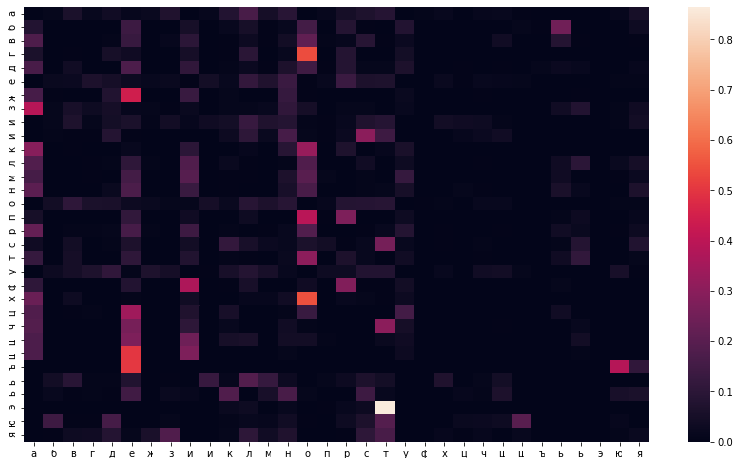

In [9]:
# построим диаграмму вероятностей переходов 
# например, здесь видим, что твердый знак идет перед буквой 'е', еще 'е' "взаимодействует" с 'ж', после 'х' и 'г' - следует 'о'
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

In [10]:
"""
Теперь посчитаем вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р
"""

P_start = 1/len(probabilities[0])   # probabilities[0] - длина составляет 32 символа (взяли по строке)
probability = {}
for i in Russian:
    for j in Russian:
        # считаем полную вероятность события: 
        prob = P_start * probabilities[ POS['п'], POS [i] ] * probabilities[ POS[i], POS [j] ] * \
        probabilities[POS[j], POS ['р']]
        if prob > 0:
            # Метод .setdefault: получить значение ключа, если его нет добавить в словарь с указанным значением
            probability.setdefault(''.join(['п', i, j, 'р']), prob) # здесь tсли указанный ключ key отсутствует, 
                                                                    # метод вставит его в словарь dict со значением default 
                                                                    # и вернет значение default (в нашем случае - prob)

In [11]:
# Выведем TOP-20 строк по вероятности
# начиная со третьей вероятности по убыванию, имеем ничтожно низкие вероятности

new_dict = list(probability.items())
new_dict.sort(key=lambda i: i[1], reverse=True) # key=lambda i: i[1] - конструкция переключает сортировку на значения 
                                                # reverse дает обратную сортировку по убыванию
new_dict[:20]

[('прер', 0.00018278080829965275),
 ('прор', 0.0001301905115004464),
 ('прар', 9.551339350430678e-05),
 ('потр', 7.126931737239235e-05),
 ('погр', 6.199973568665526e-05),
 ('подр', 6.063348183849303e-05),
 ('попр', 5.0041522251431185e-05),
 ('поер', 4.597198040839377e-05),
 ('побр', 4.200355237081231e-05),
 ('прур', 2.283039457247405e-05),
 ('пофр', 2.149051440448307e-05),
 ('прир', 2.1041749601829885e-05),
 ('повр', 1.9033365459705672e-05),
 ('покр', 1.8844057771061197e-05),
 ('пегр', 1.878999933793269e-05),
 ('пепр', 1.8165288641473525e-05),
 ('пьер', 1.6663532922797532e-05),
 ('петр', 1.595840471594324e-05),
 ('пойр', 1.568986361379384e-05),
 ('плор', 1.5196745302654172e-05)]

In [12]:
"""
Далее построим слово, начинающееся с буквы "Б" и имеющее длину 8 символов
"""

s = ['б']
length = 8
for i in range(length):
    index = POS[s[i]]
    # .choice() дает случайную выборку из значений заданного одномерного массива:
    # передали ему список и вероятности р, когда определяется вероятность соответствующего элемнта из списка оказаться в выборке
    next_char = np.random.choice(list(Russian), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

бтажехнат


In [17]:
"""
Возьмём ряд и оценим его через HMM.
Попробуем "построить" (через среднее каждой компоненты) наивный прогноз ряда
"""

data = pd.read_csv('international-airline-passengers.csv')
series = data['Count']

In [18]:
values = series.values.reshape(-1,1) # представим все данные в одном столбце

In [19]:
optimal_n = []
for n in range(1, 15):
    model = hmm.GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=2000)
    model.fit(values)
    optimal_n.append(model.score(values))

Fitting a model with 167 free scalar parameters with only 144 data points will result in a degenerate solution.
Fitting a model with 194 free scalar parameters with only 144 data points will result in a degenerate solution.
Fitting a model with 223 free scalar parameters with only 144 data points will result in a degenerate solution.


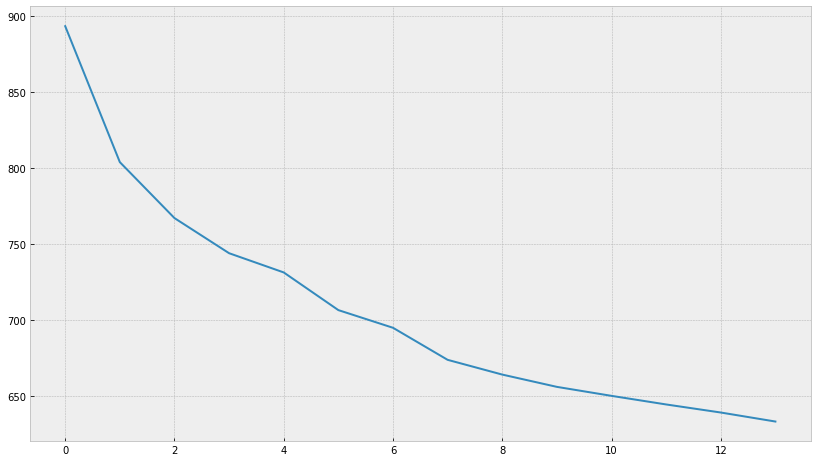

In [20]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14,8))
    plt.plot(optimal_n*np.array([-1]))
# локоть выделить сложно. Примем за него значение, равное двум 

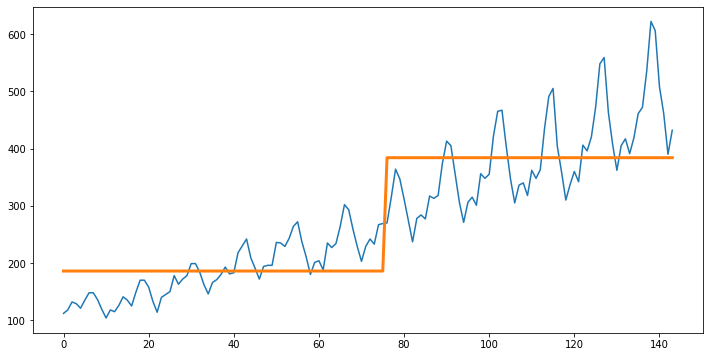

In [21]:
model = hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=2000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)   # np.zeros_like() хранит размер своего аргумента
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

In [23]:
# матрица вероятностей перехода
model.transmat_

array([[9.99999980e-01, 2.03179196e-08],
       [1.32545715e-02, 9.86745429e-01]])

In [25]:
model.transmat_.shape

(2, 2)

In [29]:
# Предскажем 20 следующих значений ряда

a = labels[-1]
prediction = []
for i in range(10):
    next_val = np.random.choice(2, p=model.transmat_[a])
    prediction.append(model.means_[next_val])


In [30]:
new_series = np.concatenate((values, np.array(prediction)))

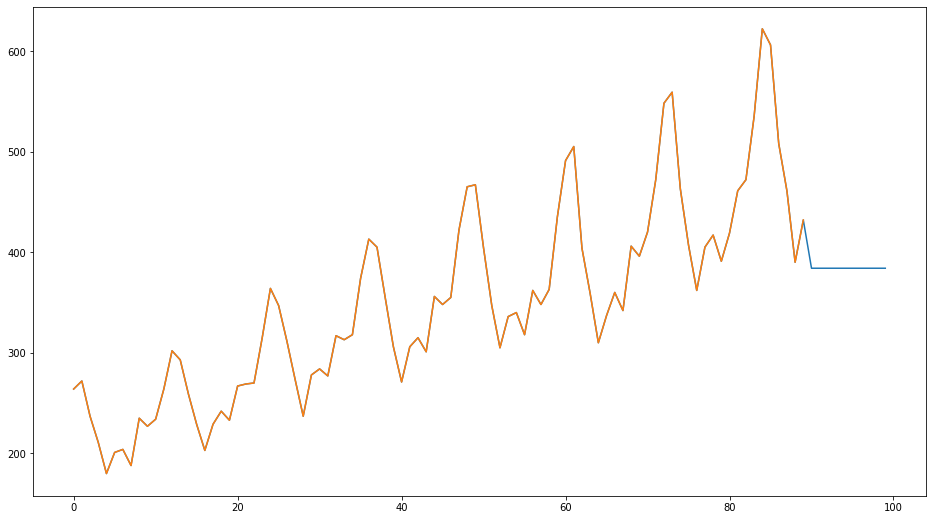

In [31]:
plt.figure(figsize=(16,9))
plt.plot(new_series[-100:])
plt.plot(values[-90:])
plt.show()